In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
RESULTS_PATH  = 'results.json'

In [4]:
mean = lambda x: sum(x)/len(x)

In [5]:
with open(RESULTS_PATH,'r') as f:
    data = json.load(f)

data_means = {}


In [6]:
data_means = {}

for file,file_results in data.items():
    data_means[file] = {'seq':mean(file_results['seq']) ,'cuda':mean(file_results['cuda'][1:])    }    


In [7]:
df = [  [file,data_means[file]['seq'],data_means[file]['cuda']]  for file in data_means ]

df = pd.DataFrame(df,columns=['filename','sequential','cuda'],index=None)
df = df.set_index('filename')
df['speedup'] = round(df['sequential']/df['cuda'],1)
df = df.sort_values('speedup')


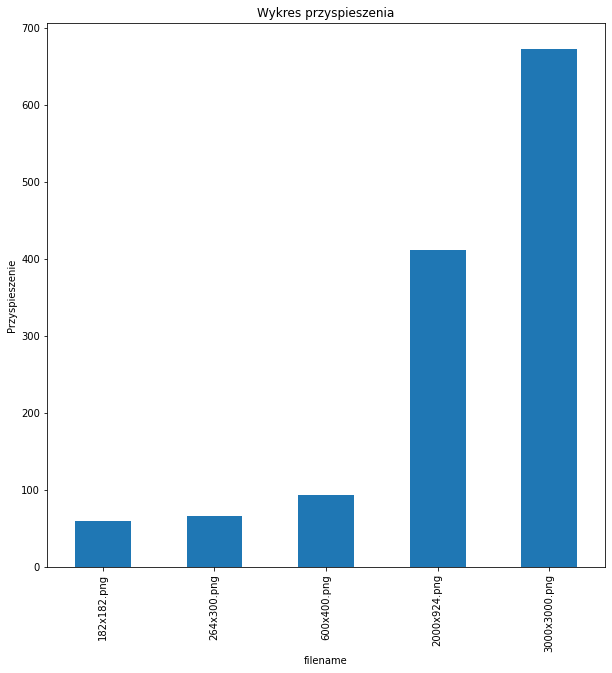

In [12]:
plot = df['speedup'].plot(kind='bar',figsize=(10,10),ylabel='Przyspieszenie',title='Wykres przyspieszenia')



# table.add_cell()


In [10]:
df

,sequential,cuda,speedup
filename,,,
182x182.png,0.12040,0.002053,58.7
264x300.png,0.26085,0.004000,65.2
600x400.png,0.80845,0.008684,93.1
2000x924.png,6.61840,0.016105,410.9
3000x3000.png,31.39295,0.046684,672.5
